# Exploratory Data Analysis with Python and SQL

### In this project will be analyzed informations about movies with real data from the IMDB DataBase.

#### Por meio da análise exploratória de Dados através do Python e Linguagem SQL e Banco de Dados, será respondido 10 perguntas:

#### Using Python and SQL Language, it will be made an exploratory data analysis to answer ten questions:

- 1. What are the Most common Movie categories on IMDB?
- 2. What is the Number of Titles by Genre?
- 3. What is the Median Rating of Movies by Genre?
- 4. What is the Median Rating of Movie Regarding the Year of Premiere?
- 5. What is the number of Movies evaluated by genre in relation to the year of release?
- 6. What is the longest running movie?
- 7. What is the Relation Between Runtime and Genre?
- 8. What is the Number of Movies produced by Country?
- 9. What are the Top 10 Best Movies?
- 10. What are the Top 10 Worst Movies?

### Installing the necessary packages
The project imdb-sqlite imports the datas from IMDB into SQLite DataBase
Numpy, Pandas, Matplotlib and seaborn is use

In [1]:
#Installing imdb-sqlite
!pip install -q imdb-sqlite

In [3]:
#Imports necessários para análise
import re
import sqlite3
import time
!pip install -q pycountry
import pycountry
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style = "whitegrid")


## Downloading the datas and creating database with the next command

In [9]:
%%time 
!imdb-sqlite

Wall time: 474 ms


2022-06-01 22:23:39,537 DB already exists: (imdb.db). Refusing to modify. Exiting


In [4]:
#Creating a conection with the database and getting the tables
conn = sqlite3.connect("imdb.db")
tables = pd.read_sql_query("SELECT NAME As 'Table_Name' FROM sqlite_master WHERE type = 'table'", conn)
tables.head()

,Table_Name
0,people
1,titles
2,akas
3,crew
4,episodes


In [15]:
# Seeing the description of each table
tables_name = tables['Table_Name'].values.tolist()

for each_table in tables_name:
    query = "PRAGMA TABLE_INFO({})".format(each_table)
    result = pd.read_sql_query(query, conn)
    print("Table description: ", each_table)
    display(result)
    print("_"*100)
    print("\n")

Table description:  people


,cid,name,type,notnull,dflt_value,pk
0,0,person_id,VARCHAR,0,None,1
1,1,name,VARCHAR,0,None,0
2,2,born,INTEGER,0,None,0
3,3,died,INTEGER,0,None,0


____________________________________________________________________________________________________


Table description:  titles


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,type,VARCHAR,0,None,0
2,2,primary_title,VARCHAR,0,None,0
3,3,original_title,VARCHAR,0,None,0
4,4,is_adult,INTEGER,0,None,0
5,5,premiered,INTEGER,0,None,0
6,6,ended,INTEGER,0,None,0
7,7,runtime_minutes,INTEGER,0,None,0
8,8,genres,VARCHAR,0,None,0


____________________________________________________________________________________________________


Table description:  akas


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,title,VARCHAR,0,None,0
2,2,region,VARCHAR,0,None,0
3,3,language,VARCHAR,0,None,0
4,4,types,VARCHAR,0,None,0
5,5,attributes,VARCHAR,0,None,0
6,6,is_original_title,INTEGER,0,None,0


____________________________________________________________________________________________________


Table description:  crew


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,person_id,VARCHAR,0,None,0
2,2,category,VARCHAR,0,None,0
3,3,job,VARCHAR,0,None,0
4,4,characters,VARCHAR,0,None,0


____________________________________________________________________________________________________


Table description:  episodes


,cid,name,type,notnull,dflt_value,pk
0,0,episode_title_id,INTEGER,0,None,0
1,1,show_title_id,INTEGER,0,None,0
2,2,season_number,INTEGER,0,None,0
3,3,eposide_number,INTEGER,0,None,0


____________________________________________________________________________________________________


Table description:  ratings


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,rating,INTEGER,0,None,0
2,2,votes,INTEGER,0,None,0


____________________________________________________________________________________________________




 # With the description of each table, we can start our exploratory data analysis
 
 ## 1. What are the Most common Movie categories on IMDB?

In [33]:
#Query
query1 = ''' SELECT type, COUNT(*) AS COUNT FROM titles GROUP BY type'''
result1= pd.read_sql_query(query1, conn)
display(result1)

,type,COUNT
0,movie,611473
1,short,872135
2,tvEpisode,6732227
3,tvMiniSeries,43608
4,tvMovie,136277
5,tvPilot,2
6,tvSeries,225843
7,tvShort,10557
8,tvSpecial,37155
9,video,261192


In [36]:
result1['Percentual'] = ( result1['COUNT'] / result1['COUNT'].sum()) * 100

In [37]:
result1

,type,COUNT,Percentual
0,movie,611473,6.823153
1,short,872135,9.731764
2,tvEpisode,6732227,75.121907
3,tvMiniSeries,43608,0.486602
4,tvMovie,136277,1.520654
5,tvPilot,2,0.000022
6,tvSeries,225843,2.520081
7,tvShort,10557,0.117801
8,tvSpecial,37155,0.414596
9,video,261192,2.914525


In [38]:
#Let's create a graphic with four categories, since we have 3 types greater than the rest

others = {}
others['COUNT'] = result1[result1["Percentual"] < 5]['COUNT'].sum()
others['Percentual'] = result1[result1["Percentual"] < 5]['Percentual'].sum()
others['type'] = 'others'
others

{'COUNT': 745901, 'Percentual': 8.32317533120815, 'type': 'others'}

In [39]:
result1 = result1[result1['Percentual']>5]
result1 = result1.append(others, ignore_index=True)
result1 = result1.sort_values(by='COUNT', ascending=False)
result1

,type,COUNT,Percentual
2,tvEpisode,6732227,75.121907
1,short,872135,9.731764
3,others,745901,8.323175
0,movie,611473,6.823153


In [41]:
labels = [ str(result1['type'][i])+ ' - '+str(round(result1['Percentual'][i],2)) +'%' for i in result1.index]

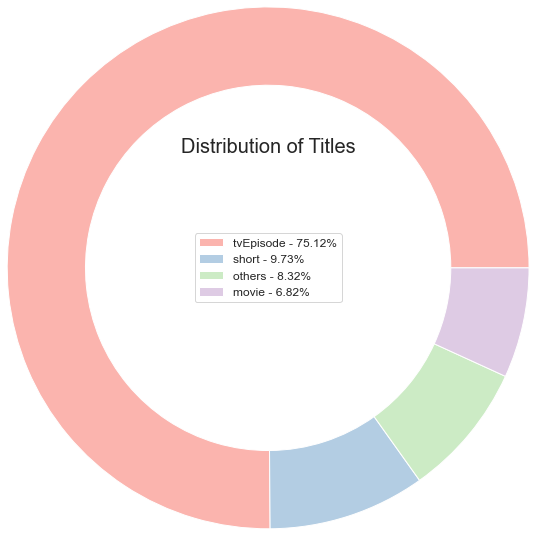

In [58]:
#Plotting

f = plt.figure()
cs = cm.Pastel1(np.arange(100))

plt.pie(result1['COUNT'], colors = cs, labeldistance = 1, radius = 3, wedgeprops = {'width': 0.9})
plt.legend(labels= labels, loc = 'center', prop = {'size': 12})
plt.title('Distribution of Titles', loc='center', fontdict = {'fontsize':20 , 'fontweight': 20})
plt.show()

# 2. How many titles by genre?


In [59]:
query2 = '''SELECT genres, COUNT(*) AS COUNT FROM titles GROUP BY genres'''
result2 = pd.read_sql_query(query2,conn)
result2

,genres,COUNT
0,Action,34337
1,"Action,Adult",157
2,"Action,Adult,Adventure",66
3,"Action,Adult,Animation",67
4,"Action,Adult,Comedy",42
...,...,...
2310,"Thriller,Western",46
2311,War,2725
2312,"War,Western",14
2313,Western,13821


In [60]:
result2['genres'] = result2['genres'].str.lower().values

In [61]:
temp = result2['genres'].dropna()

In [64]:
#Using Regular Expression and Using countvectorizer from scikit to create a vector
pattern ='(?u)\\b[\\w-]+\\b'

vector = CountVectorizer(token_pattern = pattern, analyzer='word').fit(temp)

In [66]:
new_genres = vector.transform(temp)

In [68]:
unique_genres = vector.get_feature_names()
unique_genres

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'n',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [73]:
genres = pd.DataFrame(new_genres.todense(), columns= unique_genres, index = temp.index)
genres = genres.drop(columns='n')

In [74]:
genres_percentual = 100* pd.Series(genres.sum()).sort_values(ascending=False) / genres.shape[0]

In [76]:
genres_percentual.head()

comedy         14.643629
drama          14.125270
short          13.909287
documentary    12.915767
adventure      12.613391
dtype: float64

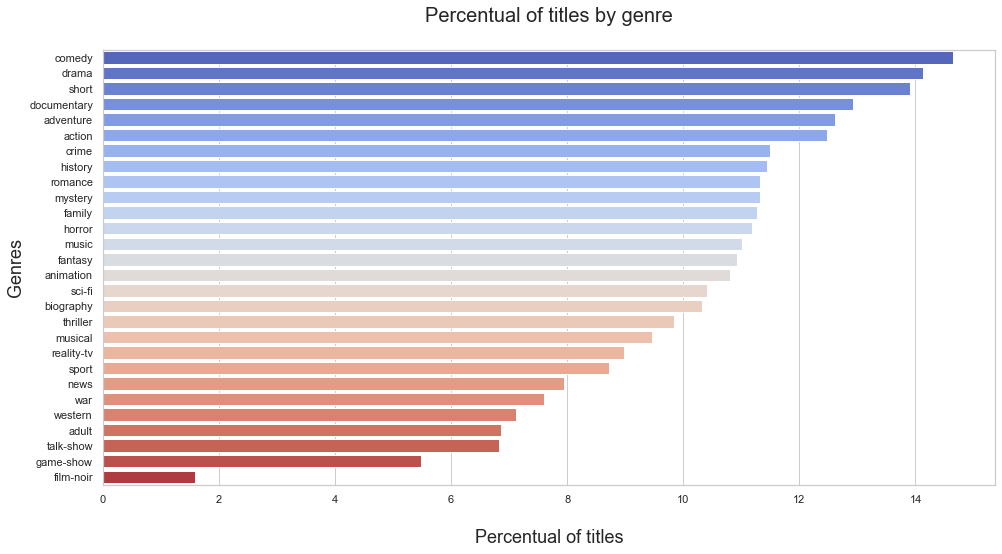

In [92]:
plt.figure(figsize=(16,8))
sns.barplot(x = genres_percentual.values, y = genres_percentual.index, orient='h', palette='coolwarm')
plt.xlabel('\nPercentual of titles', size=18)
plt.ylabel('Genres', size= 18)
plt.title('Percentual of titles by genre\n', size=20)
plt.show()

# 3. What is the Median Rating of Movies by Genre?

In [174]:
query3 = ''' SELECT rating, genres FROM ratings JOIN titles ON ratings.title_id == titles.title_id
            WHERE premiered <=2022 AND type = 'movie' '''

In [175]:
result3 = pd.read_sql_query(query3,conn)
result3

,rating,genres
0,4.5,\N
1,6.0,"Action,Adventure,Biography"
2,4.5,Drama
3,4.5,Drama
4,3.9,Drama
...,...,...
278848,5.8,Thriller
278849,6.4,"Drama,History"
278850,3.8,"Adventure,History,War"
278851,8.3,Drama


In [176]:
#Function to return unique genres using countvectorizer
def return_genres(df):
    df['genres'] = df['genres'].str.lower().values
    temp = df['genres'].dropna()
    vector = CountVectorizer(token_pattern = '(?u)\\b[\\w-]+\\b', analyzer = 'word').fit(temp)
    generos_unicos =  vector.get_feature_names()
    generos_unicos = [genre for genre in generos_unicos if len(genre) > 1]
    return generos_unicos


In [177]:
unique_genres = return_genres(result3)
unique_genres

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [178]:
genres_counts = []
genres_ratings = []

for item in unique_genres:
    
    #COUNT MOVIES BY GENRES
    query = 'SELECT COUNT(rating) FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    result = pd.read_sql_query(query, conn)
    genres_counts.append(result.values[0][0])
  
     # Ratings movies by genres
    query = 'SELECT rating FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    result = pd.read_sql_query(query, conn)
    genres_ratings.append(np.median(result['rating']))

In [179]:
df_genres_rating = pd.DataFrame()
df_genres_rating['genres'] = unique_genres
df_genres_rating['count'] = genres_counts
df_genres_rating['ratings'] = genres_ratings
df_genres_rating.head(20)

,genres,count,ratings
0,action,28877,5.8
1,adult,4377,5.8
2,adventure,17515,6.0
3,animation,4789,6.5
4,biography,8499,7.0
5,comedy,68912,6.0
6,crime,23858,6.1
7,documentary,41739,7.3
8,drama,123513,6.3
9,family,10773,6.3


In [180]:
df_genres_rating = df_genres_rating.drop(index=18) #deleting news because it's not a genre of movie


In [181]:
df_genres_rating = df_genres_rating.sort_values(by='ratings', ascending=False)

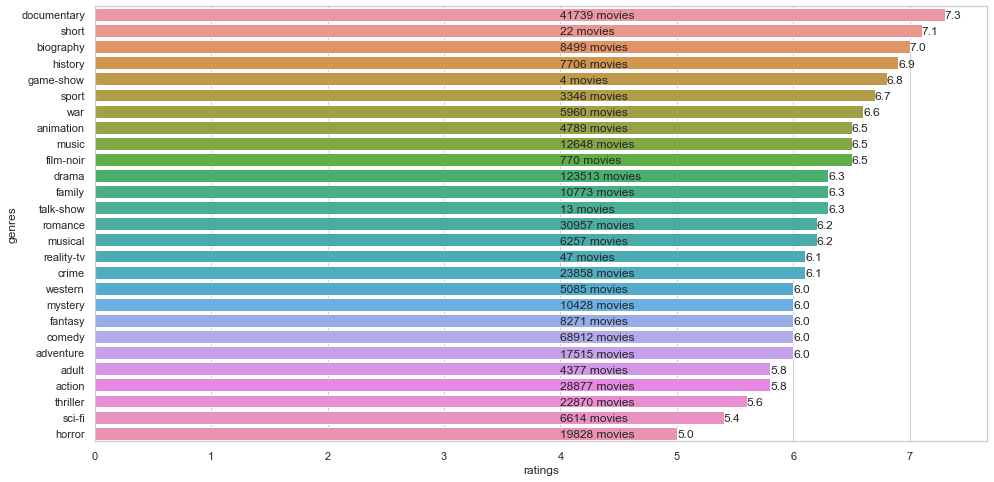

In [182]:
# Plot

plt.figure(figsize=(16,8))

sns.barplot(x=df_genres_rating.ratings, y=df_genres_rating.genres, orient='h')

#Subtitles
for i in range(len(df_genres_rating.index)):
    plt.text(4, i+ 0.25, str(df_genres_rating['count'][df_genres_rating.index[i]]) + ' movies')
    
    plt.text(df_genres_rating.ratings[df_genres_rating.index[i]], i + 0.25, 
    round(df_genres_rating['ratings'][df_genres_rating.index[i]],2))

plt.show()

# 4. What is the Median of Film Rating in relation to the year of release?

In [121]:
query4 = '''SELECT rating, premiered FROM ratings JOIN titles ON ratings.title_id == titles.title_id 
            WHERE premiered <= 2022 AND type = 'movie' ORDER BY premiered '''

In [122]:
result4 = pd.read_sql_query(query4,conn)
result4

,rating,premiered
0,6.7,1896
1,4.5,1897
2,4.0,1899
3,3.7,1899
4,6.0,1900
...,...,...
278848,7.6,2022
278849,9.5,2022
278850,7.1,2022
278851,5.0,2022


In [125]:
ratings = []
for year in set(result4['premiered']):
    ratings.append(np.median(result4[result4['premiered'] == year]['rating']))


In [127]:
anos = list(set(result4['premiered']))

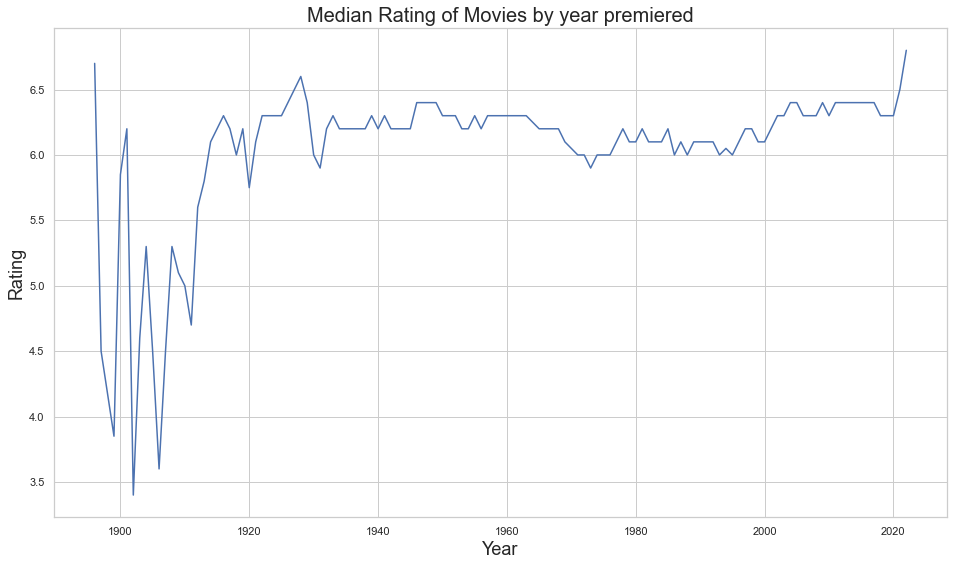

In [130]:
#plot

plt.figure(figsize=(16,9))
plt.plot(anos, ratings)
plt.xlabel("Year", size=18)
plt.ylabel('Rating', size=18)
plt.title('Median Rating of Movies by year premiered', size=20)
plt.show()

# 5. What is the Number of Movies Rated by genre in relation to the year of release?

In [135]:
query5 = '''SELECT genres FROM titles'''
result5 = pd.read_sql_query(query5,conn)
unique_genres = return_genres(result5)
unique_genres

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [148]:
genres_count = []

for item in unique_genres:
    query = 'SELECT COUNT(*) AS COUNT FROM titles WHERE genres LIKE' + '\''+'%'+item+'%' + '\' AND type = \'movie\' AND premiered <=2022'
    result = pd.read_sql_query(query,conn)
    genres_count.append(result['COUNT'].values[0])


In [150]:
df_genres_count = pd.DataFrame()
df_genres_count['genre'] = unique_genres
df_genres_count['count'] = genres_count
df_genres_count

,genre,count
0,action,41626
1,adult,8593
2,adventure,22544
3,animation,6858
4,biography,13795
5,comedy,91675
6,crime,30988
7,documentary,106899
8,drama,193214
9,family,15095


In [152]:
df_genres_count = df_genres_count.sort_values(by='count', ascending =False)
top5_genres = df_genres_count.head()['genre'].values

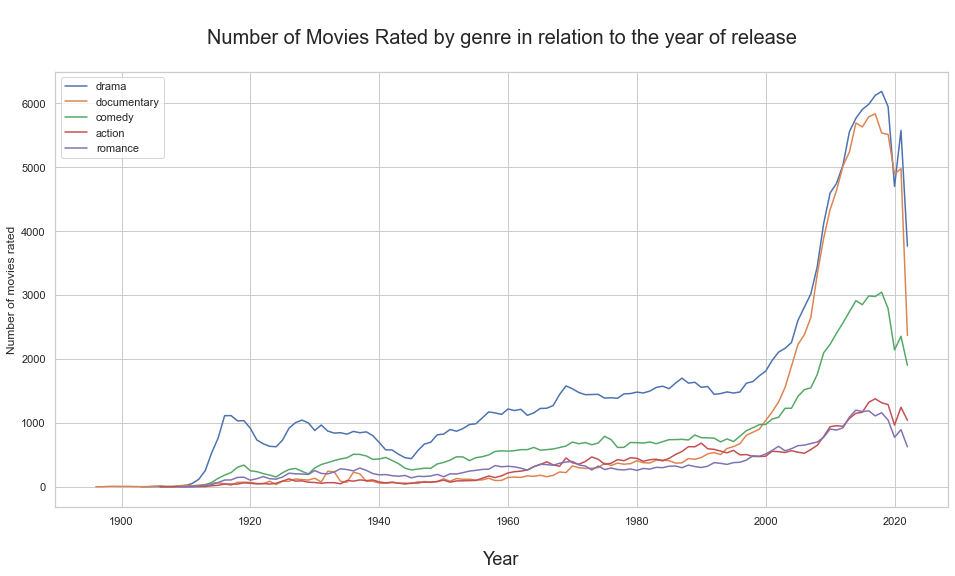

In [156]:
#plot

plt.figure(figsize=(16,8))

for item in top5_genres:
    query = 'SELECT COUNT(*) AS Number_of_movies, premiered as Year FROM titles WHERE genres LIKE '+'\''+'%'+item+'%' + '\' AND type = \'movie\' AND Year <=2022 GROUP BY Year'
    resultado = pd.read_sql_query(query,conn)
    plt.plot(resultado['Year'], resultado['Number_of_movies'])

plt.xlabel('\nYear', size=18)
plt.ylabel('Number of movies rated')
plt.title('\nNumber of Movies Rated by genre in relation to the year of release\n', size=20)
plt.legend(labels = top5_genres)
plt.show()

##### As we can see, after the start of COVID-19 pandemic, the number of movies decreased.

# 6- What is the longest running movie?

## Also, calculating the percentiles.

In [16]:
query6 = '''
        SELECT runtime_minutes AS runtime, primary_title FROM titles 
        WHERE type = 'movie' AND runtime != 'NaN' 
        ORDER BY runtime DESC
        LIMIT 5
        '''

In [17]:
result6 = pd.read_sql_query(query6, conn)
result6

,runtime,primary_title
0,51420,Logistics
1,43200,Ambiancé
2,28643,Carnets Filmés (Liste Complète)
3,14400,Modern Times Forever
4,10062,Qw


The film 'Logistics' is the longest running movie, until now (2022). It has 857 hours.

  # 7. What is the relation between runtime and genre?

In [26]:
query7 = '''
        SELECT runtime_minutes, genres 
        FROM titles
        WHERE type = 'movie' AND runtime_minutes != 'NaN'
        GROUP BY genres
        '''

In [27]:
result7 = pd.read_sql_query(query7, conn)
result7

,runtime_minutes,genres
0,220,Action
1,91,"Action,Adult"
2,69,"Action,Adult,Adventure"
3,73,"Action,Adult,Comedy"
4,74,"Action,Adult,Crime"
...,...,...
1372,105,"Thriller,Western"
1373,51,War
1374,50,"War,Western"
1375,56,Western


In [28]:
unique_genres = return_genres(result7)
unique_genres

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [30]:
genres_runtime = []

for item in unique_genres:
    query = 'SELECT runtime_minutes AS runtime FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND Runtime!=\'NaN\''
    result = pd.read_sql_query(query, conn)
    genres_runtime.append(np.median(result['runtime']))

In [35]:
df_genres_runtime = pd.DataFrame()
df_genres_runtime['runtime'] = genres_runtime
df_genres_runtime['genres'] = unique_genres
df_genres_runtime = df_genres_runtime.sort_values(by='runtime', ascending=False)
df_genres_runtime.head()

,runtime,genres
20,95.0,romance
0,94.0,action
26,93.0,war
8,93.0,drama
16,93.0,musical


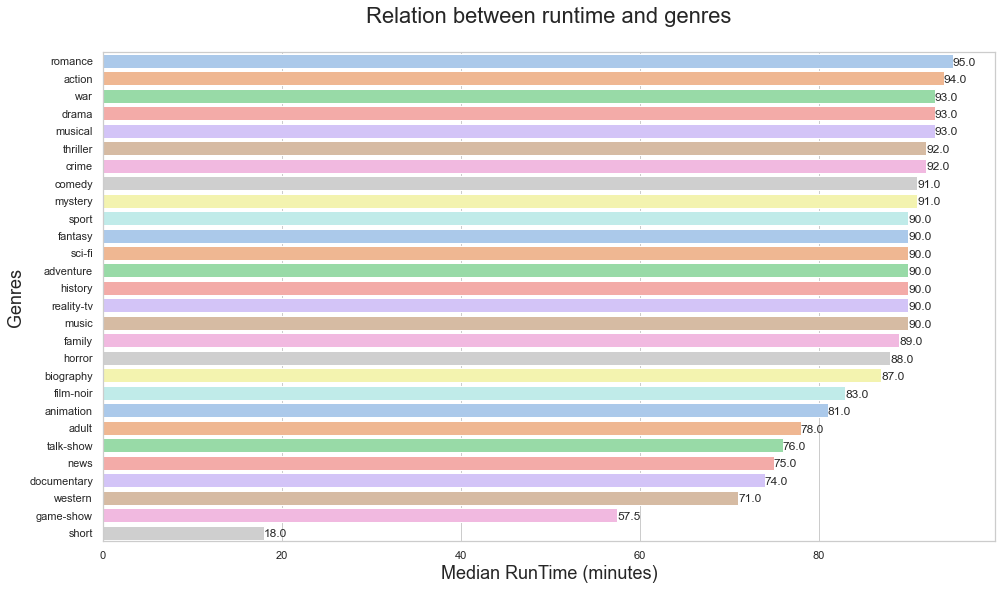

In [56]:
plt.figure(figsize=(16,9))


sns.barplot(x=df_genres_runtime['runtime'], y=df_genres_runtime['genres'], orient='h', palette ='pastel')
plt.title("Relation between runtime and genres\n", size=22)
plt.xlabel('Median RunTime (minutes)', size=18)
plt.ylabel('Genres', size=18)

for i in range(len(df_genres_runtime.index)):
    plt.text(df_genres_runtime.runtime[df_genres_runtime.index[i]],
            i + 0.25, df_genres_runtime['runtime'][df_genres_runtime.index[i]])


plt.show()

# 8- Number of Movies produced by country

In [74]:
query8= '''
        SELECT region, COUNT(*) AS Number_of_Movies 
        FROM akas JOIN titles ON akas.title_id == titles.title_id
        WHERE type = 'movie' AND premiered <=2022 AND region != 'None'
        GROUP BY region
        '''

In [75]:
result8 = pd.read_sql_query(query8,conn)
result8

,region,Number_of_Movies
0,AD,7
1,AE,6643
2,AF,100
3,AG,12
4,AL,1271
...,...,...
228,YUCS,152
229,ZA,3055
230,ZM,13
231,ZRCD,2


In [105]:
names_country = []
count = []

In [106]:
for i in range(result8.shape[0]):
    try:
        country = result8['region'].values[i]
        countryname = pycountry.countries.get(alpha_2 = country)
        names_country.append(countryname.name)
        count.append(result8['Number_of_Movies'][i])
    except:
        continue
        

In [125]:
df_country_movies = pd.DataFrame()
df_country_movies['Country'] = names_country
df_country_movies['Count'] = count
df_country_movies = df_country_movies.sort_values(by='Count', ascending=False)
df_country_movies.head(10)

,Country,Count
198,United States,258596
65,United Kingdom,148892
96,Japan,91286
63,France,83850
89,India,78827
32,Canada,75351
47,Germany,70150
26,Brazil,65300
58,Spain,65087
93,Italy,64860


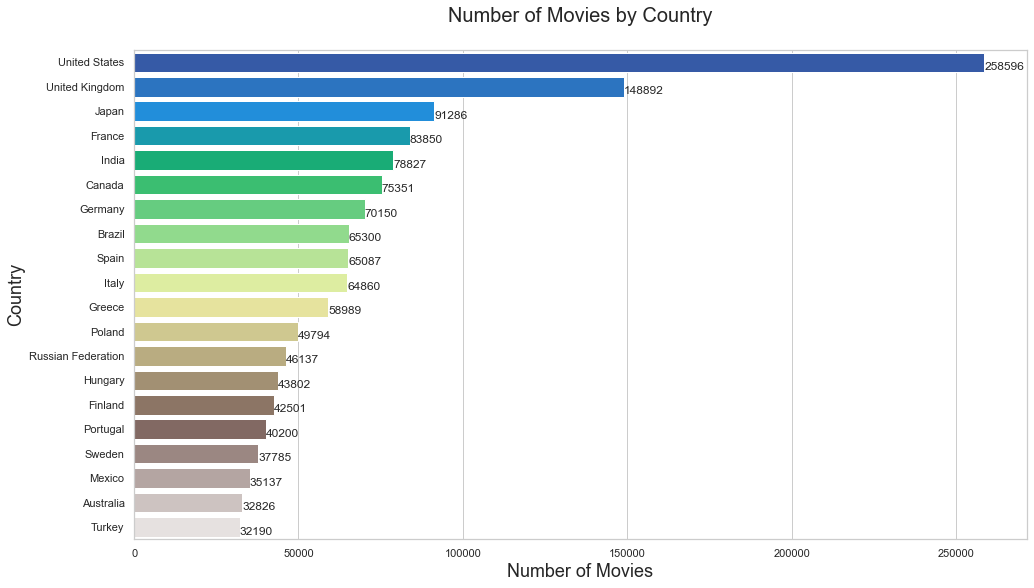

In [127]:
#Plot

plt.figure(figsize=(16,9))

sns.barplot(df_country_movies[:20]['Count'], df_country_movies[:20]['Country'], orient='h', palette='terrain')

for i in range(0,20):
    plt.text(df_country_movies.Count[df_country_movies.index[i]]-1,
             i + 0.30,
             round(df_country_movies["Count"][df_country_movies.index[i]],2))
    
plt.title("Number of Movies by Country\n", size=20)
plt.xlabel("Number of Movies", size=18)
plt.ylabel("Country", size=18)
    
plt.show()

# 9 - What are the Top 10 Best Movies?

### Movies with more than 25000 votes

In [167]:
query9 = '''SELECT primary_title AS Movie, genres, rating
        FROM titles JOIN ratings ON titles.title_id = ratings.title_id 
        WHERE titles.type = 'movie' AND ratings.votes >= 25000
        ORDER BY rating DESC
        LIMIT 10
        '''

In [168]:
result9 = pd.read_sql_query(query9,conn)
result9

,Movie,genres,rating
0,The Shawshank Redemption,Drama,9.3
1,The Chaos Class,"Comedy,Drama",9.3
2,The Godfather,"Crime,Drama",9.2
3,12 Angry Men,"Crime,Drama",9.0
4,The Godfather: Part II,"Crime,Drama",9.0
5,Schindler's List,"Biography,Drama,History",9.0
6,The Lord of the Rings: The Return of the King,"Action,Adventure,Drama",9.0
7,The Dark Knight,"Action,Crime,Drama",9.0
8,Mirror Game,"Crime,Mystery,Thriller",9.0
9,Pulp Fiction,"Crime,Drama",8.9


#### These are the top10 best movies by rating from IMDB

# 10. What are the Top 10 Worst Movies?
## Movies with more than 30000 votes

In [171]:
query10 = '''SELECT primary_title AS Movie, genres, rating
        FROM titles JOIN ratings 
        ON titles.title_id = ratings.title_id 
        WHERE titles.type = 'movie' AND ratings.votes >= 30000
        ORDER BY rating ASC
        LIMIT 10
        '''

In [172]:
result10 = pd.read_sql_query(query10,conn)
result10

,Movie,genres,rating
0,Reis,"Biography,Drama",1.0
1,Cumali Ceber,Comedy,1.0
2,Sadak 2,"Action,Drama",1.1
3,Smolensk,"Drama,Thriller",1.2
4,Superbabies: Baby Geniuses 2,"Comedy,Family,Sci-Fi",1.5
5,The Cost of Deception,"Crime,Drama,History",1.5
6,Manos: The Hands of Fate,Horror,1.6
7,Justin Bieber: Never Say Never,"Documentary,Music",1.6
8,The Hottie & the Nottie,"Comedy,Romance",1.9
9,Radhe,"Action,Crime,Thriller",1.9
